In [1]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, Embedding, Bidirectional, LSTM, concatenate, Dense
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
import tensorflow as tf

In [2]:
# Load knowledge graph triples and concept attribute collocations with labels
df_kg = pd.read_excel('C:/Users/sanmeet/Documents/4th_Year/4th_Year_Sem2/BTech_Project/code/knowledge_graph_triples_complete.xls')
print(df_kg)

# df_ca = pd.read_excel('C:/Users/sanmeet/Documents/4th_Year/4th_Year_Sem2/BTech_Project/code/concept_attribute_col.xls')
# print(df_ca)

# new_df = df_kg
# new_df['Concept'] = df_ca['Concept']
# new_df['Attribute'] = df_ca['Attribute']

# print(new_df)

# shuffle the DataFrame rows
# df_kg = df_kg.sample(frac = 1)
df_kg = df_kg.sample(frac=1).reset_index(drop=True)
print(df_kg)

labels = []
triples = []
for i in range(df_kg.shape[0]):
    triples.append(tuple([df_kg['Target'][i], df_kg['Attribute'][i], df_kg['Source'][i]]))
    labels.append(df_kg['labels'][i])
    
labels = np.array(labels)

print(triples)

# print(df_kg.shape)
# print(len(triples))

        Target       Attribute                    Source  labels
0         face           black                      coal       1
1        uncle           blind                       bat       1
2        naina            cool                  cucumber       1
3      soldier           brave                      lion       1
4           he         cunning                       fox       1
...        ...             ...                       ...     ...
1810  Computer         Stylish              Sleek Design       0
1811     Chair         Stylish      Decorative Stitching       0
1812     Movie        Animated             Cartoon Style       0
1813    Person            Kind       Empathetic Attitude       0
1814   Vehicle  Fuel-efficient  Hybrid Engine Technology       0

[1815 rows x 4 columns]
       Target    Attribute                  Source  labels
0         she      distant  remote tropical island       1
1     mansion        grand                  palace       1
2        book  int

In [3]:
df_ca = pd.read_excel('C:/Users/sanmeet/Documents/4th_Year/4th_Year_Sem2/BTech_Project/code/concept_attribute_col.xls')
print(df_ca)

concepts  = []
for i in range(df_ca.shape[0]):
#     concepts.append(tuple([df_ca['Concept'][i], df_ca['Attribute'][i]]))
    concepts.append(tuple([df_kg['Target'][i], df_kg['Attribute'][i]]))
    
print(concepts)

print(df_ca.shape)
print(len(concepts))

       Concept       Attribute  labels
0         face           black       1
1        uncle           blind       1
2        naina            cool       1
3      soldier           brave       1
4           he         cunning       1
...        ...             ...     ...
1810  Computer         Stylish       0
1811     Chair         Stylish       0
1812     Movie        Animated       0
1813    Person            Kind       0
1814   Vehicle  Fuel-efficient       0

[1815 rows x 3 columns]
[('she', 'distant'), ('mansion', 'grand'), ('book', 'interesting'), ('carrier', 'continuous'), ('Art', 'Inspiring'), ('ideas', 'other'), ('he', 'adventurous'), ('Chair', 'Lightweight'), ('smell', 'pungent'), ('worm', 'slippery'), ('she', 'rich'), ('temple', 'tall'), ('twig', 'light'), ('athlete movements', 'graceful'), ('Ice Cream', 'Sweet'), ('company growth', 'swift'), ('Person', 'Friendly'), ('doll limbs', 'slender'), ('he', 'loyal'), ('vanishing loveliness', 'tender'), ('mailbox', 'sturdy'), ('the'

In [4]:
# Create vocabulary
vocab = set()
for triple in triples:
    vocab.update(triple)
for concept in concepts:
    vocab.update(concept)
    
print(vocab)

{'jelly', 'Filling', 'seasoned sailor', 'Abstract', 'couple commitment', 'axe', 'brightly', 'dip', 'puppy', 'Crispy', 'Health Benefits', 'nymphs', 'gourmet meal', 'satisfying', 'determined', 'iniyan', 'sing', 'pure', 'island', 'Beach', 'stone walls', 'harsh', 'glow', 'High Resolution', 'funny', 'town square', 'freshly baked dinner roll', 'changeable', 'woman hair', 'heated opal', 'hair', 'wet eel', 'difficult', 'queen throne', 'head', 'well-oiled machine', 'floppy', 'spray', 'saucers', 'ribbon dancing', 'evening sky', 'path', 'dominate', 'car horn', 'thunderclap', 'fruit', 'Design Aesthetics', 'brick', 'shelves', 'Bag', 'Habitat Loss', 'mind', 'apple flesh', 'drill sergeant', 'child', 'tedious', 'firm', 'Intellectual Analysis', 'hot', 'Decorative Stitching', 'Empathetic Attitude', 'warm blanket', 'Filtration System', 'Apple', 'time bomb', 'Price Range', 'Fuel-efficient', 'great', 'swoop', 'Artistic Detailing', 'airport terminal', 'death', 'coat', 'rain', 'stooped forms', 'cockroach ant

In [7]:
# Assign unique IDs to words in vocabulary
word_to_id = {word: i for i, word in enumerate(vocab)}
id_to_word = {i: word for word, i in word_to_id.items()}
%store word_to_id

Stored 'word_to_id' (dict)


In [6]:
# Encode triples and concepts with unique IDs
encoded_triples = [[word_to_id[word] for word in triple] for triple in triples]
encoded_concepts = [[word_to_id[word] for word in concept] for concept in concepts]

print(encoded_triples)

[[937, 591, 649], [2174, 1324, 2204], [1195, 1308, 421], [184, 2345, 1960], [2643, 927, 2506], [142, 2582, 940], [2279, 936, 2651], [1410, 2091, 2446], [117, 1126, 438], [1971, 893, 343], [937, 526, 1577], [545, 580, 2203], [2258, 1188, 1340], [1440, 1467, 2227], [1640, 2202, 2515], [151, 1341, 139], [1546, 83, 520], [1128, 2175, 1725], [2279, 882, 706], [1299, 2504, 1154], [567, 2220, 2284], [1659, 1565, 1136], [1277, 2263, 2177], [334, 999, 880], [308, 2087, 2685], [2681, 2407, 1403], [2160, 1800, 2159], [1898, 2425, 2234], [1718, 999, 806], [2274, 2684, 2390], [2341, 1999, 186], [1072, 1026, 1978], [1968, 827, 1158], [702, 2066, 2537], [2152, 1665, 1658], [111, 1094, 973], [690, 269, 2059], [1752, 2559, 345], [2279, 1149, 1437], [2702, 1852, 1722], [2101, 2415, 629], [313, 2081, 389], [682, 1193, 1144], [1706, 273, 424], [1382, 260, 796], [2618, 919, 1794], [557, 1084, 2462], [1250, 999, 1693], [857, 2268, 295], [206, 2374, 2193], [2627, 1774, 1228], [2523, 1919, 2448], [1181, 1812,

In [87]:
# Pad encoded sequences
max_length = max(len(seq) for seq in encoded_triples + encoded_concepts)
padded_triples = pad_sequences(encoded_triples, maxlen=max_length, padding='post')
padded_concepts = pad_sequences(encoded_concepts, maxlen=max_length, padding='post')

In [88]:
# Split data into training and testing sets
split = int(len(padded_triples) * 0.8)
train_triples, test_triples = padded_triples[:split], padded_triples[split:]
train_concepts, test_concepts = padded_concepts[:split], padded_concepts[split:]

# train_labels, test_labels = np.array([1, 0, 0]), np.array([0, 1, 1])
train_labels, test_labels = labels[:split], labels[split:]

In [89]:
# Define bi-LSTM model with shared embedding layers
input_triples = Input(shape=(max_length,))
input_concepts = Input(shape=(max_length,))
embedding_layer = Embedding(len(vocab), 100, input_length=max_length)
shared_embedding_triples = embedding_layer(input_triples)
shared_embedding_concepts = embedding_layer(input_concepts)
lstm_layer = Bidirectional(LSTM(64))
lstm_triples = lstm_layer(shared_embedding_triples)
lstm_concepts = lstm_layer(shared_embedding_concepts)
concatenated_output = concatenate([lstm_triples, lstm_concepts])
output_layer = Dense(1, activation='sigmoid')(concatenated_output)
model = Model(inputs=[input_triples, input_concepts], outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [90]:
# Train model on training set
train_labels = np.array(train_labels)
print(len(train_labels))
print(np.count_nonzero(train_labels == 1))
model.fit([train_triples, train_concepts], train_labels, epochs=10, batch_size=32)
# print(type(np.array(train_labels)))
# print(type((train_triples)))
# print(np.array([train_triples, train_concepts]))
# merged_array = np.stack([train_triples, train_concepts], axis=1)
# model.fit(merged_array,train_labels, epochs=10, batch_size=32)

# data_set = tf.data.Dataset.from_tensor_slices(([train_triples, train_concepts] ,train_labels))
# model.fit(data_set, epochs=10, batch_size=32)

1452
1245
Epoch 1/10
46/46 [==============================] - 7s 12ms/step - loss: 0.5096 - accuracy: 0.8526
Epoch 2/10
46/46 [==============================] - 1s 14ms/step - loss: 0.1262 - accuracy: 0.9339
Epoch 3/10
46/46 [==============================] - 1s 14ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 4/10
46/46 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 5/10
46/46 [==============================] - 1s 13ms/step - loss: 7.9238e-04 - accuracy: 1.0000
Epoch 6/10
46/46 [==============================] - 1s 12ms/step - loss: 5.2500e-04 - accuracy: 1.0000
Epoch 7/10
46/46 [==============================] - 1s 13ms/step - loss: 3.7976e-04 - accuracy: 1.0000
Epoch 8/10
46/46 [==============================] - 1s 13ms/step - loss: 2.8847e-04 - accuracy: 1.0000
Epoch 9/10
46/46 [==============================] - 1s 13ms/step - loss: 2.2841e-04 - accuracy: 1.0000
Epoch 10/10
46/46 [==============================] - 1s 15ms/step - loss: 1.860

In [108]:
loss, accuracy = model.evaluate([test_triples, test_concepts], test_labels, verbose=0)

In [109]:
print(accuracy)

0.9779614210128784


In [110]:
print(loss)

0.06101667508482933


In [94]:
# Make predictions on the new data
y_pred = model.predict([test_triples, test_concepts])

12/12 [==============================] - 0s 3ms/step


In [98]:
class_labels = np.round(y_pred).astype(int).flatten()
# print(class_labels)
# print(test_labels)

In [99]:
from sklearn.metrics import accuracy_score

# Assume 'class_labels' contains the predicted class labels, and 'true_labels' contains the true class labels
accuracy = accuracy_score(test_labels, class_labels)
print("Accuracy:", accuracy)

Accuracy: 0.977961432506887


In [100]:
from sklearn.metrics import classification_report

y_true = test_labels
y_pred = class_labels
target_names = ['metaphor', 'non-metaphor']

print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    metaphor       0.96      0.88      0.92        50
non-metaphor       0.98      0.99      0.99       313

    accuracy                           0.98       363
   macro avg       0.97      0.94      0.95       363
weighted avg       0.98      0.98      0.98       363



In [101]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 44   6]
 [  2 311]]


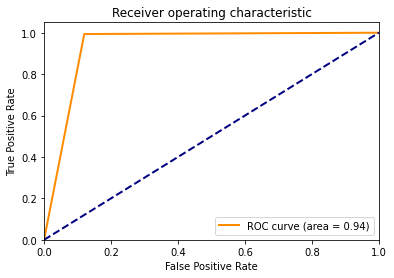

<Figure size 432x288 with 0 Axes>

In [105]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_score = [0.6, 0.8, 0.4, 0.9, 0.2]
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('roc.png')

In [142]:
# save model
model.save('model_keras/model.h5')

# Application

In [146]:
# triples = [('sky','blue','ocean')]
# concepts = [('sky', 'blue')]

triples = [('Drink','Strong','Alcohol Content')]
concepts = [('Drink', 'Strong')]

In [147]:
# Encode triples and concepts with unique IDs
encoded_triples = [[word_to_id[word] for word in triple] for triple in triples]
encoded_concepts = [[word_to_id[word] for word in concept] for concept in concepts]
# Pad encoded sequences
max_length = max(len(seq) for seq in encoded_triples + encoded_concepts)
padded_triples = pad_sequences(encoded_triples, maxlen=max_length, padding='post')
padded_concepts = pad_sequences(encoded_concepts, maxlen=max_length, padding='post')

In [148]:
# load model
from keras import models
model = models.load_model('model_keras/model.h5')

In [149]:
y_pred = model.predict([padded_triples, padded_concepts])

1/1 [==============================] - 2s 2s/step


In [150]:
np.round(y_pred).astype(int).flatten()

array([0])

In [177]:
# Program to make a simple
# login screen 
 
 
import tkinter as tk
  
root=tk.Tk()
 
# setting the windows size
root.geometry("500x150")
  
# declaring string variable
# for storing name and password
name_var=tk.StringVar()
passw_var=tk.StringVar()
 
  
# defining a function that will
# get the name and password and
# print them on the screen
def predict():
 
    name=name_var.get()
     
#     name_var.set("")
#     passw_var.set("")
    
#     triples = [('sky','blue','ocean')]
#     concepts = [('sky', 'blue')]

    triples = [('Drink','Strong','Alcohol Content')]
    concepts = [('Drink', 'Strong')]
    
    # Encode triples and concepts with unique IDs
    encoded_triples = [[word_to_id[word] for word in triple] for triple in triples]
    encoded_concepts = [[word_to_id[word] for word in concept] for concept in concepts]
    # Pad encoded sequences
    max_length = max(len(seq) for seq in encoded_triples + encoded_concepts)
    padded_triples = pad_sequences(encoded_triples, maxlen=max_length, padding='post')
    padded_concepts = pad_sequences(encoded_concepts, maxlen=max_length, padding='post')
    
    # load model
    from keras import models
    model = models.load_model('model_keras/model.h5')
    
    y_pred = model.predict([padded_triples, padded_concepts])
    res = np.round(y_pred).astype(int).flatten()
    
    ans = ["Metaphor" if res[0] else "Non-Metaphor"]
    l3 = tk.Label(root,text=ans,width=50,font=('calibre',10,'normal'))  
    l3.grid(row=5,column=1,pady=10)
     
     
# creating a label for
# name using widget Label
name_label = tk.Label(root, text = 'Sentence', font=('calibre',10, 'bold'))
  
# creating a entry for input
# name using widget Entry
name_entry = tk.Entry(root,textvariable = name_var, font=('calibre',10,'normal'), width=50)
  
  
# creating a button using the widget
# Button that will call the submit function
sub_btn=tk.Button(root,text = 'Predict', command = predict)
  
# placing the label and entry in
# the required position using grid
# method
name_label.grid(row=0,column=0, pady=10, padx=5)
name_entry.grid(row=0,column=1, pady=10)

sub_btn.grid(row=2,column=1,pady=10)
  
# performing an infinite loop
# for the window to display
root.mainloop()

1/1 [==============================] - 1s 1s/step
